<div style="background: linear-gradient(90deg, #00f2ff, #ff00ff); padding: 20px; border-radius: 15px; text-align:center; margin:30px 0; box-shadow: 0 0 20px rgba(0,255,255,0.6);">
  <h1 style="color:black; margin:0; font-size:42px; font-weight:900; text-shadow: 2px 2px 10px white;">
   Temporal and Seasonal Effects in Wind and Solar Energy Output: A Statistical Study
  </h1>
</div>

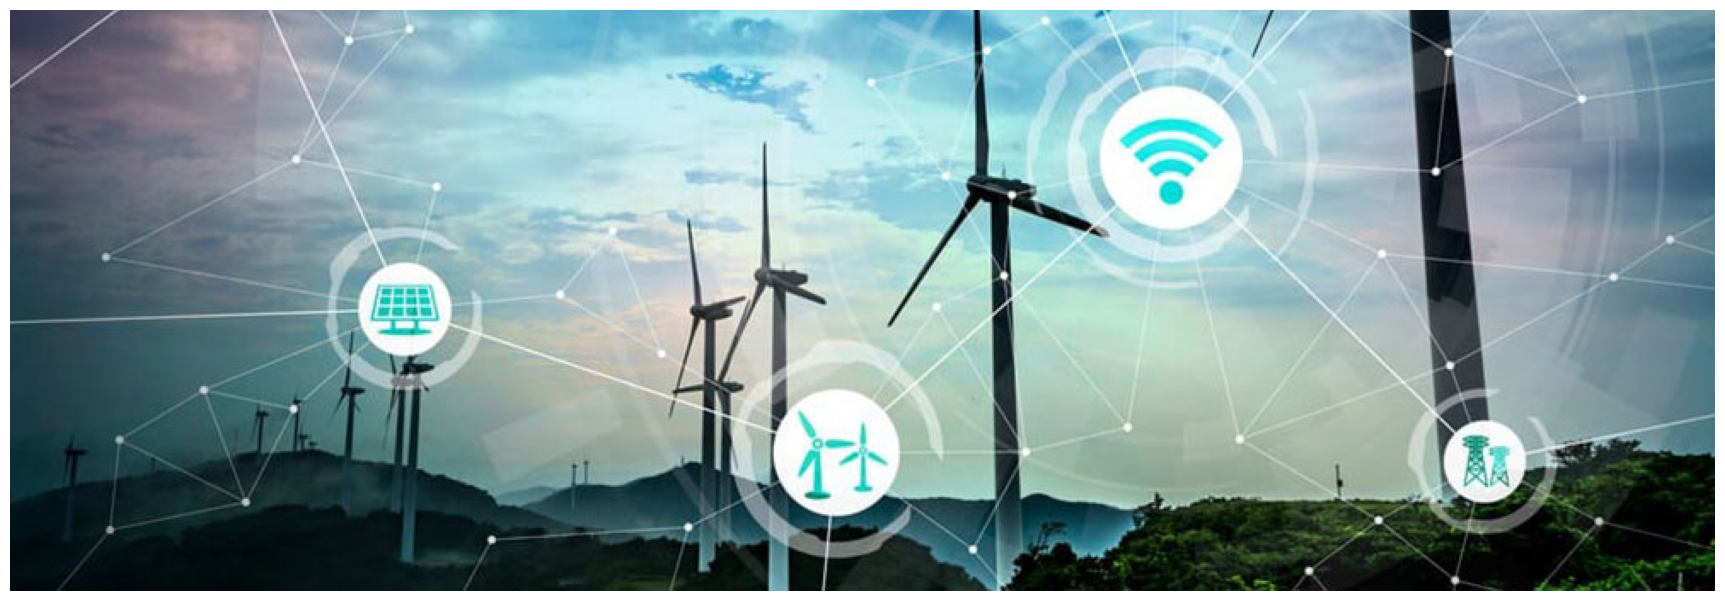

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(r"C:\Users\hp\Pictures\data-science-in-transforming-the-energy-industry.jpg")
plt.figure(figsize=(22, 14))  
plt.imshow(img)
plt.axis('off')
plt.show()

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;"> IMPORT LIBRARIES,ALGORITHMS AND METRICS
 </h2>
</div>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats.mstats import winsorize
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy import stats

<div style="background: linear-gradient(90deg, #14ffd8ff, #ff0000ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #14b5ffff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;"> LOAD DATASET
 </h2>
</div>

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Energy Production Dataset.csv")
df

Date  Start_Hour  End_Hour Source  Day_of_Year   Day_Name  \
0      11/30/2025          21        22   Wind          334     Sunday   
1      11/30/2025          18        19   Wind          334     Sunday   
2      11/30/2025          16        17   Wind          334     Sunday   
3      11/30/2025          23         0   Wind          334     Sunday   
4      11/30/2025           6         7   Wind          334     Sunday   
...           ...         ...       ...    ...          ...        ...   
51859    1/1/2020           4         5   Wind            1  Wednesday   
51860    1/1/2020          18        19   Wind            1  Wednesday   
51861    1/1/2020           7         8   Wind            1  Wednesday   
51862    1/1/2020          14        15  Solar            1  Wednesday   
51863    1/1/2020          13        14  Solar            1  Wednesday   

      Month_Name  Season  Production  
0       November    Fall        5281  
1       November    Fall        3824  
2       November    Fall        3824  
3       November    Fall        6120  
4       November    Fall        4387  
...          ...     ...         ...  
51859    January  Winter        2708  
51860    January  Winter        1077  
51861    January  Winter        2077  
51862    January  Winter        1783  
51863    January  Winter        2179  

[51864 rows x 9 columns]

<div style="background: linear-gradient(90deg, #143fffff, #eeff00ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #c0ff14ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Data preprocessing
 </h2>
</div>

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday  # 0=Monday, etc.
# Then drop 'Date' if needed
df = df.drop('Date', axis=1)

In [5]:
for x in df:
    print(x)
    print(df[x].unique())
    print(df[x].nunique())

Start_Hour
[21 18 16 23  6  4  5  8 12 15 22  0  1  2 11 17 19 10  3 20 14 13  9  7]
24
End_Hour
[22 19 17  0  7  5  6  9 13 16 23  1  2  3 12 18 20 11  4 21 15 14 10  8]
24
Source
['Wind' 'Solar' 'Mixed']
3
Day_of_Year
[334 333 332 331 330 329 328 327 326 325 324 323 322 321 320 319 318 317
 316 315 314 313 312 311 310 309 308 307 306 305 304 303 302 301 300 299
 298 297 296 295 294 293 292 291 290 289 288 287 286 285 284 283 282 281
 280 279 278 277 276 275 274 273 272 271 270 269 268 267 266 265 264 263
 262 261 260 259 258 257 256 255 254 253 252 251 250 249 248 247 246 245
 244 243 242 241 240 239 238 237 236 235 234 233 232 231 230 229 228 227
 226 225 224 223 222 221 220 219 218 217 216 215 214 213 212 211 210 209
 208 207 206 205 204 203 202 201 200 199 198 197 196 195 194 193 192 191
 190 189 188 187 186 185 184 183 182 181 180 179 178 177 176 175 174 173
 172 171 170 169 168 167 166 165 164 163 162 161 160 159 158 157 156 155
 154 153 152 151 150 149 148 147 146 145 144 143 1

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51864 entries, 0 to 51863
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Start_Hour   51864 non-null  int64 
 1   End_Hour     51864 non-null  int64 
 2   Source       51864 non-null  object
 3   Day_of_Year  51864 non-null  int64 
 4   Day_Name     51864 non-null  object
 5   Month_Name   51864 non-null  object
 6   Season       51864 non-null  object
 7   Production   51864 non-null  int64 
 8   Year         51864 non-null  int32 
 9   Weekday      51864 non-null  int32 
dtypes: int32(2), int64(4), object(4)
memory usage: 3.6+ MB


In [7]:
df.describe()

Start_Hour      End_Hour   Day_of_Year    Production          Year  \
count  51864.000000  51864.000000  51864.000000  51864.000000  51864.000000   
mean      11.500000     11.500000    180.798415   6215.069933   2022.463674   
std        6.922253      6.922253    104.291387   3978.364965      1.693759   
min        0.000000      0.000000      1.000000     58.000000   2020.000000   
25%        5.750000      5.750000     91.000000   3111.000000   2021.000000   
50%       11.500000     11.500000    181.000000   5372.000000   2022.000000   
75%       17.250000     17.250000    271.000000   8501.000000   2024.000000   
max       23.000000     23.000000    366.000000  23446.000000   2025.000000   

            Weekday  
count  51864.000000  
mean       3.002314  
std        1.999439  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000

In [8]:
dt=pd.DataFrame(df.dtypes)
dt["missingval"]=df.isnull().sum()
dt["Nunique"]=df.nunique()
dt["count"]=df.count()
dt=dt.rename(columns={0:"data type"})
dt

data type  missingval  Nunique  count
Start_Hour      int64           0       24  51864
End_Hour        int64           0       24  51864
Source         object           0        3  51864
Day_of_Year     int64           0      366  51864
Day_Name       object           0        7  51864
Month_Name     object           0       12  51864
Season         object           0        4  51864
Production      int64           0    14617  51864
Year            int32           0        6  51864
Weekday         int32           0        7  51864

<div style="background: linear-gradient(90deg, #ff1418ff, #00ffb7ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #e014ffff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Outlier Ditection
 </h2>
</div>

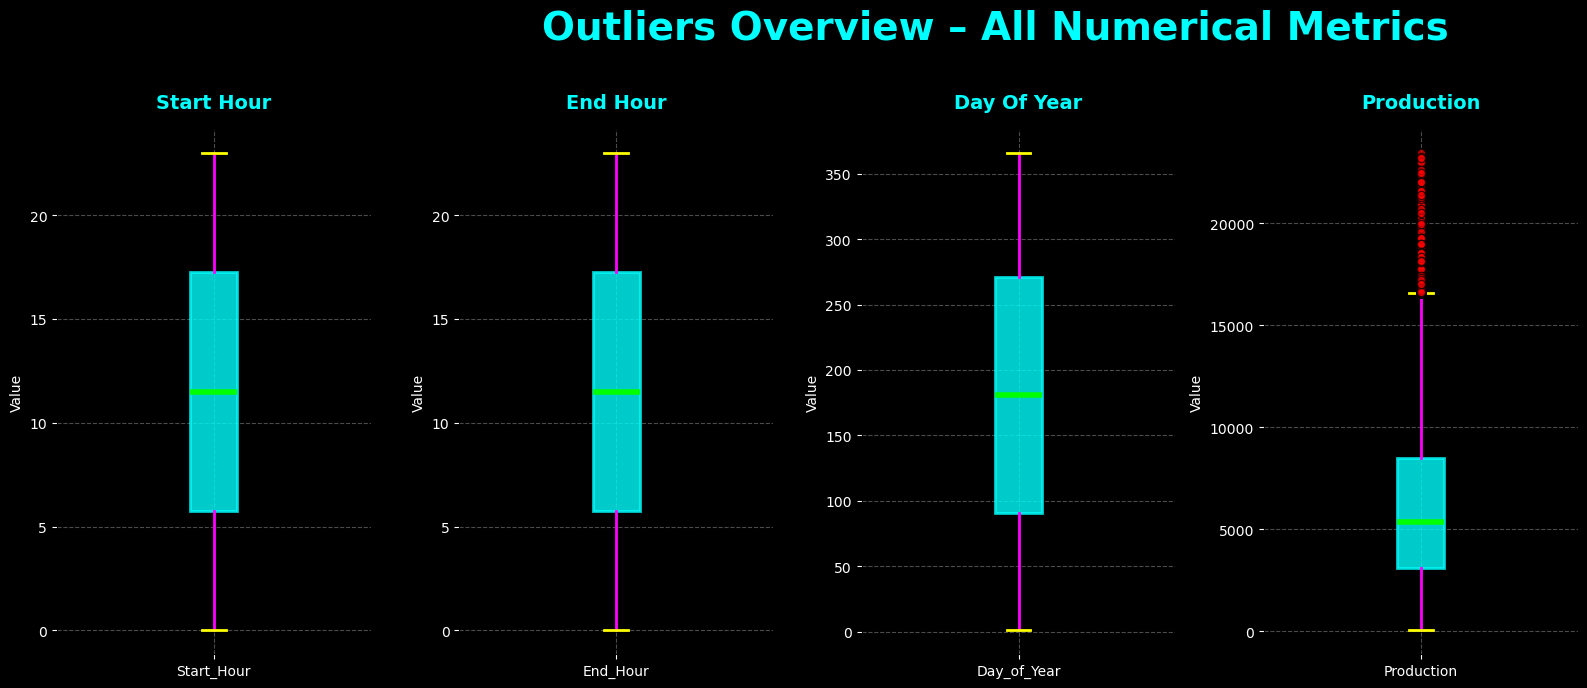

In [9]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 12))
plt.suptitle('Outliers Overview – All Numerical Metrics', 
             fontsize=28, fontweight='bold', color='cyan', y=1.02)

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 5, i) 
    
    df.boxplot(column=col, ax=plt.gca(),
               boxprops=dict(facecolor='cyan', color='cyan', linewidth=2, alpha=0.8),
               whiskerprops=dict(color='magenta', linewidth=2),
               capprops=dict(color='yellow', linewidth=2),
               medianprops=dict(color='lime', linewidth=4),
               flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.7),
               patch_artist=True)
    
    plt.title(col.replace("_", " ").title(), 
              color='cyan', fontsize=14, fontweight='bold', pad=15)
    plt.ylabel('Value', color='white', fontsize=10)
    plt.grid(True, alpha=0.3, color='white', linestyle='--')
    plt.gca().set_facecolor('black')
    plt.tick_params(colors='white')  

plt.gcf().set_facecolor('black')
plt.tight_layout()
plt.subplots_adjust(top=0.92)  
plt.show()

<div style="background: linear-gradient(90deg, #ff1418ff, #00ffb7ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #e014ffff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Clipping
 </h2>
</div>

In [10]:
# 2. Even shorter + common choice (99.7%)
df['Production'] = df.groupby('Source')['Production'].transform(lambda g: g.clip(upper=g.quantile(.997)))

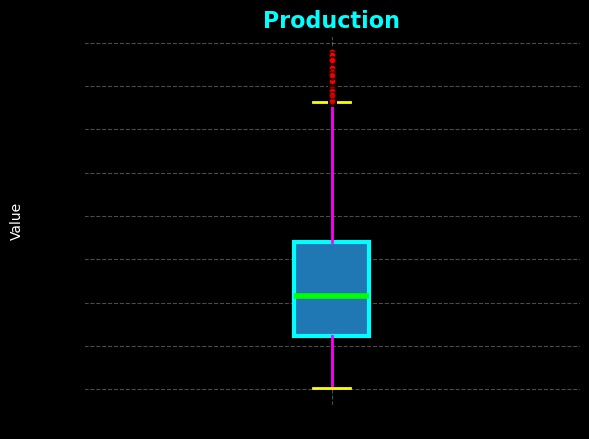

In [11]:
cliping=["Production"]
for col in cliping:
    df.boxplot(column=col, 
               boxprops=dict(color='cyan', linewidth=3),
               whiskerprops=dict(color='magenta', linewidth=2),
               capprops=dict(color='yellow', linewidth=2),
               medianprops=dict(color='lime', linewidth=4),
               flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7),
               patch_artist=True)  # This enables beautiful filled boxes
    plt.title(f'{col.replace("_", " ").title()}', color='cyan', fontsize=16, fontweight='bold')
    plt.ylabel('Value', color='white')
    plt.grid(True, alpha=0.3, color='white', linestyle='--')
    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')
    plt.show()

<div style="background: linear-gradient(90deg, #ff14c0ff, #0088ffff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #14fbffff;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;">VISUALIZATION</h1>
</div>




<h3 style="background-color: #00f721ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Box Plot </h3




═════════════════════════════════════════════
     PRODUCTION STATISTICS AFTER CLIPPING    
═════════════════════════════════════════════
count    51864.00
mean      6211.49
std       3966.71
min         58.00
25%       3111.00
50%       5372.00
75%       8501.00
max      19434.20
Name: Production, dtype: float64
═════════════════════════════════════════════



C:\Users\hp\AppData\Local\Temp\ipykernel_10748\2637292696.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


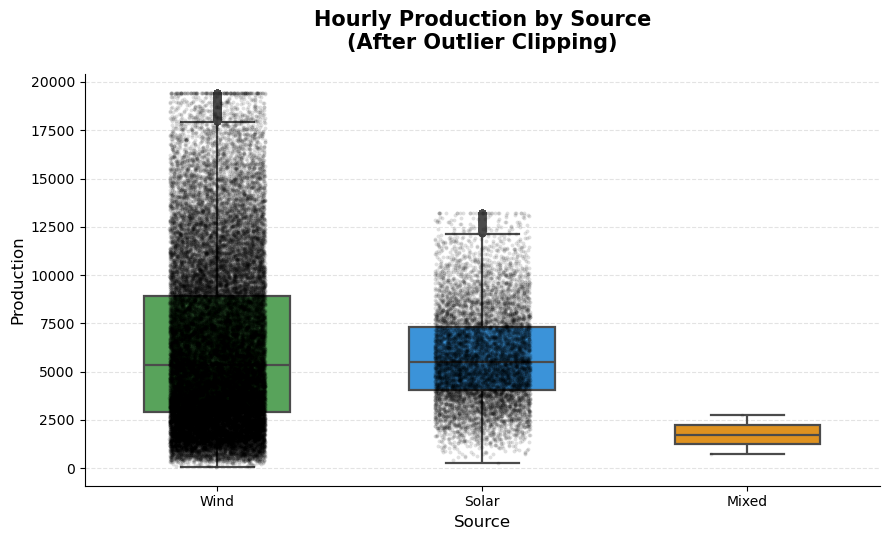

In [12]:

print("\n" + "═" * 45)
print(" PRODUCTION STATISTICS AFTER CLIPPING ".center(45))
print("═" * 45)
stats = df['Production'].describe().round(2)
print(stats)
print("═" * 45 + "\n")

plt.figure(figsize=(9, 5.5))

colors = ['#4CAF50', '#2196F3', '#FF9800'] 

sns.boxplot(
    x='Source',
    y='Production',
    data=df,
    palette=colors,
    width=0.55,
    linewidth=1.6,
    fliersize=4.5
)

sns.stripplot(
    x='Source',
    y='Production',
    data=df,
    color='black',
    alpha=0.12,
    size=2.8,
    jitter=0.18
)

plt.title('Hourly Production by Source\n(After Outlier Clipping)', 
          fontsize=15, fontweight='bold', pad=18)

plt.xlabel('Source', fontsize=12)
plt.ylabel('Production', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.35)
sns.despine()

plt.tight_layout()
plt.show()

**Quick summary of the plot**  
Hourly energy production varies clearly by source after outlier clipping:  
- **Wind** shows the highest median and widest range (up to ~20,000).  
- **Solar** has a moderate median with less spread.  
- **Mixed** has the lowest values but very few data points.  

The dense **black shades** (dots) behind each box represent every individual hourly observation, revealing the actual data density and distribution across ~51,864 records.




<h3 style="background-color: rgb(223, 81, 185); color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Box Plot </h3



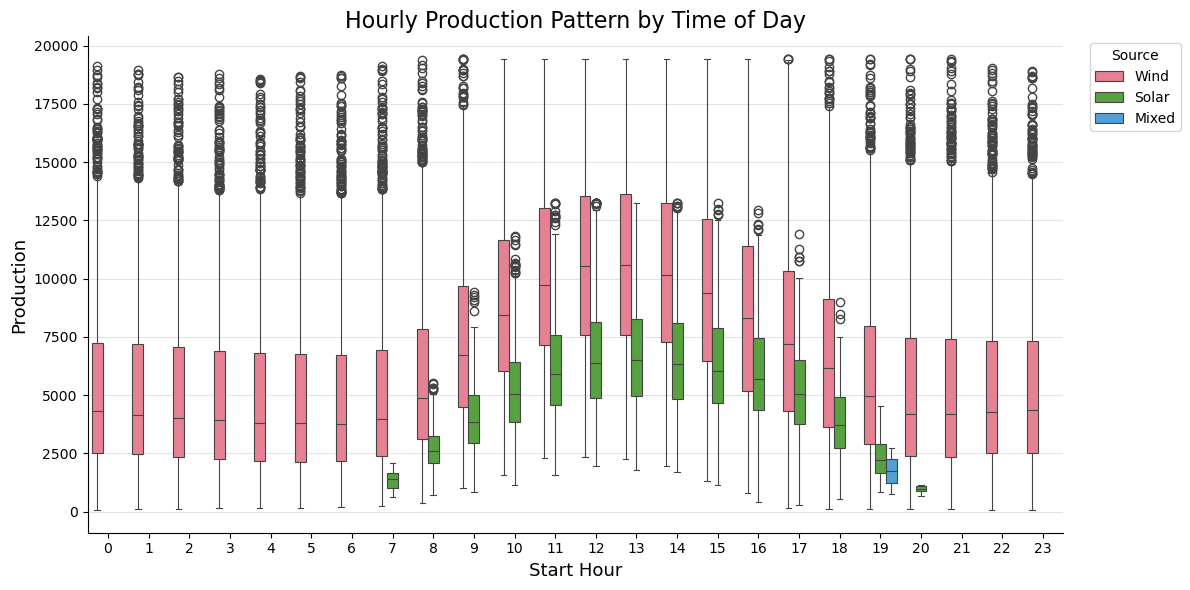

In [13]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x='Start_Hour',
    y='Production',
    hue='Source',
    palette='husl',           # colorful and distinguishable
    linewidth=0.8
)

plt.title("Hourly Production Pattern by Time of Day", fontsize=16)
plt.xlabel("Start Hour", fontsize=13)
plt.ylabel("Production", fontsize=13)
plt.legend(title="Source", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', alpha=0.35)
sns.despine()

plt.tight_layout()
plt.show()

### Hourly Production Pattern by Time of Day

The boxplot reveals distinct diurnal patterns across energy sources:

- **Solar** production peaks sharply between 10:00–15:00 (median ≈ 5,000–7,500) and drops to near zero at night, reflecting strong dependence on sunlight.
- **Wind** shows relatively stable output throughout all 24 hours (median typically 3,000–6,000), with moderate variation during both day and night.
- **Mixed** sources appear infrequently and exhibit consistently low production levels.

This highlights solar's strict daytime dependency versus wind's more consistent temporal distribution.




<h3 style="background-color: rgb(224, 8, 8); color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Heatmap / Correlation</h3



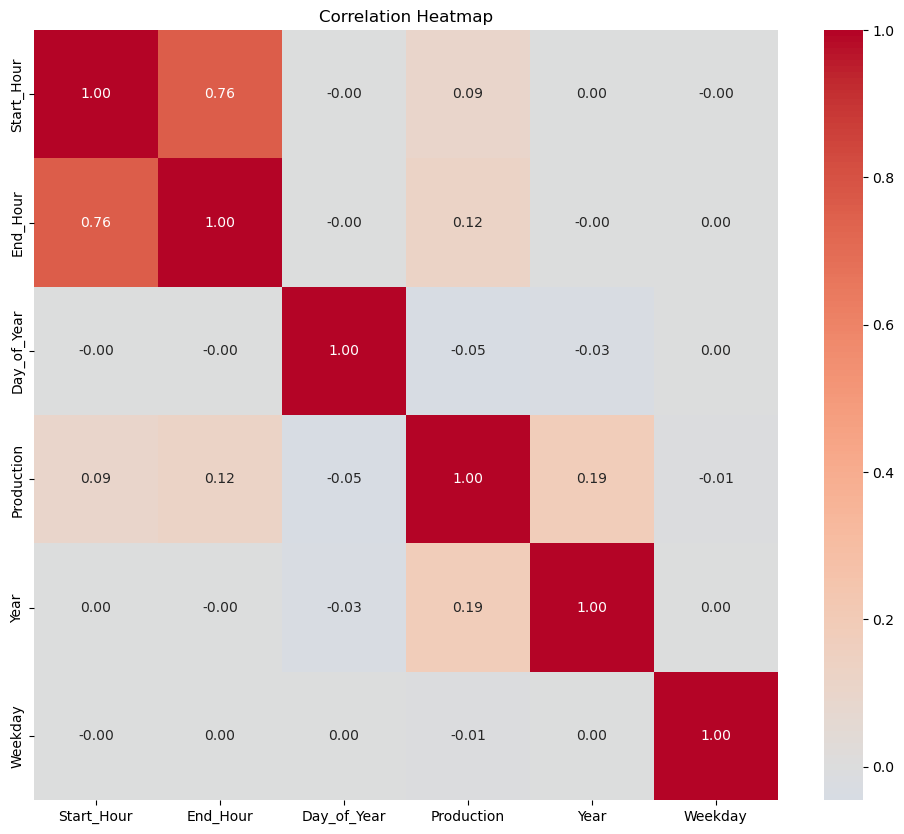

Production     1.000000
Year           0.185283
End_Hour       0.124540
Start_Hour     0.093704
Weekday       -0.007756
Day_of_Year   -0.045560
Name: Production, dtype: float64


In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Top correlations with Production
print(df.corr(numeric_only=True)['Production'].sort_values(ascending=False).head(10))

### Correlation Heatmap Summary

This heatmap displays Pearson correlations among key features and the target `Production`:

- **High correlation (0.76)**: `Start_Hour` and `End_Hour` are strongly related (as expected, since they describe the same time interval).
- **Moderate correlation (0.19)**: `Year` has the strongest (though still modest) positive link with `Production` — hinting at a slight long-term increase over years.
- **Weak correlations with Production**:
  - `Start_Hour`: 0.09  
  - `End_Hour`: 0.12  
  - `Day_of_Year`: -0.05  
  - `Weekday`: -0.01  
- All other pairwise correlations are very close to zero.

**Main insight**:  
Temporal variables (hour, day of year, weekday) show **very weak linear relationships** with energy production. The modest year-to-year trend is the only noticeable pattern. This explains the low R² in linear models and supports using non-linear approaches (e.g., tree-based models) for better prediction.




<h3 style="background-color: rgb(0, 206, 247); color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Pairplot </h3



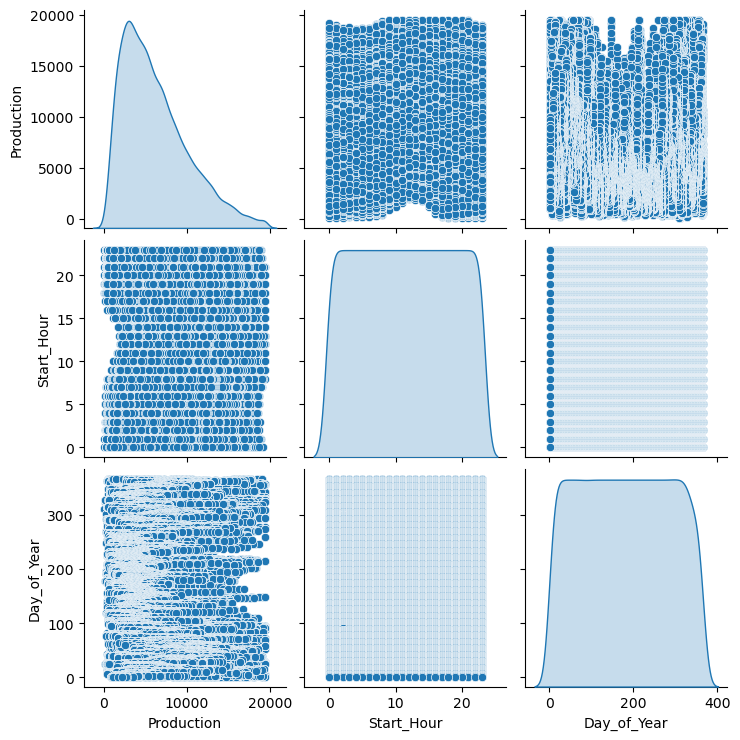

In [15]:
sns.pairplot(df[['Production', 'Start_Hour', 'Day_of_Year']], diag_kind='kde')
plt.show()

### Distribution & Pairwise Plot Summary

This plot shows the marginal distributions (diagonal) and pairwise relationships between `Production`, `Start_Hour`, and `Day_of_Year`:

- **Production**: Strongly right-skewed — most hourly values are low (near 0–5,000), with a long tail of higher outputs (up to ~20,000).
- **Start_Hour**: Roughly uniform across 0–23, with slight concentration in daytime hours (8–18).
- **Day_of_Year**: Fairly even spread across the year (0–365), no obvious seasonal clustering.

**Relationships**:
- `Production` vs `Start_Hour`: Weak tendency toward higher values during daytime hours, but still heavy overlap at low production.
- `Production` vs `Day_of_Year`: No visible seasonal pattern — high/low values occur throughout the year.
- `Start_Hour` vs `Day_of_Year`: Random scatter (no relationship).

**Takeaway**: Production is highly skewed with only subtle time-of-day influence and almost no clear seasonal effect. This supports using non-linear models to capture complex, non-linear patterns.

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;"> Hypothesis Testing with z-test
</h1>
</div>

In [16]:
Wind_Production = df[df['Source'] == 'Wind']['Production']
Solar_Production = df[df['Source'] == 'Solar']['Production']



z_stat, p_value = ztest(Wind_Production, Solar_Production)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0 → Production differs by Source ")
else:
    print("Fail to Reject H0 → No Production difference by Source")

Z-statistic: 11.39929573730652
P-value: 4.215150542176545e-30
Reject H0 → Production differs by Source 


### Z-Test: Wind vs Solar Mean Hourly Production

**Null Hypothesis (H₀):**  
μ_Wind = μ_Solar  
(There is no difference in the population mean hourly energy production between Wind and Solar sources.)

**Alternative Hypothesis (H₁):**  
μ_Wind ≠ μ_Solar  
(There is a difference in the population mean hourly energy production between Wind and Solar sources.)  
(two-sided test)

**Test Used:** Independent two-sample Z-test (large sample sizes)

**Result:**  
- Z-statistic = 11.40  
- p-value ≈ 4.2 × 10⁻³⁰

**Decision:**  
p < 0.001 → **Reject H₀** at any conventional significance level (α = 0.05, 0.01, 0.001).

**Conclusion:**  
There is extremely strong statistical evidence that the average hourly energy production differs significantly between Wind and Solar sources. Descriptive statistics and boxplots indicate that Wind produces substantially higher mean output per hour than Solar in this dataset (2020–2025).

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;"> Hypothesis Testing with T-test
</h1>
</div>

In [20]:
Summer_Production = df[df['Season'] == 'Summer']['Production']
Winter_Production = df[df['Season'] == 'Winter']['Production']
t_stat, p_value = ttest_ind(Summer_Production, Winter_Production, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference exists.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: -49.87769667079515
P-value: 0.0
Reject the null hypothesis: Significant difference exists.


<h2 style="color:#00ff9d; border-bottom:2px solid #ffffff; padding-bottom:8px;">
     One-tailed
</h2>

In [21]:
# One-tailed p-value
one_tailed_p = p_value / 2

if t_stat > 0 and one_tailed_p < 0.05:
   print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


### T-Test: Summer vs Winter Mean Hourly Production

**Null Hypothesis (H₀):**  
μ_Summer = μ_Winter  
(There is no difference in the population mean hourly energy production between Summer and Winter seasons.)

**Alternative Hypothesis (H₁):**  
μ_Summer ≠ μ_Winter  
(There is a difference in the population mean hourly energy production between Summer and Winter seasons.)  
(two-sided test)

**Test Used:** Welch’s t-test (unequal variances)

**Result:**  
- T-statistic = -49.88  
- p-value ≈ 0.0

**Decision:**  
p < 0.001 → **Reject H₀** at any conventional significance level.

**Conclusion:**  
There is extremely strong statistical evidence that average hourly energy production differs significantly between Summer and Winter.  
Winter shows substantially higher mean production than Summer (likely due to stronger wind generation during colder months).

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;"> Hypothesis Testing with chi2 test
</h1>
</div>

In [22]:
categorical_cols = ['Source', 'Day_Name',"Month_Name",'Season']

In [23]:
df['Production_bin'] = pd.qcut(df['Production'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

In [24]:
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col],df['Production_bin'])
    chi2,p_val,dof,expected,=chi2_contingency(contingency_table)
    print(contingency_table)
    print("expected value:",expected)
    print(f"chi2 Stastics: {chi2}")
    print(f"p_val:{p_val}")
    if p_val < 0.05 :
        print(f"There is a statistically significant association between {col} and Production.")
    else:
        print(f"There is no statistically significant association between {col} and Production.")
print("\n")


Production_bin    Low  Medium-Low  Medium-High   High
Source                                               
Mixed               2           0            0      0
Solar            1166        3313         3572   1327
Wind            11806        9650         9391  11637
expected value: [[5.00308499e-01 4.99884313e-01 4.99884313e-01 4.99922875e-01]
 [2.34594655e+03 2.34395754e+03 2.34395754e+03 2.34413836e+03]
 [1.06275531e+04 1.06185426e+04 1.06185426e+04 1.06193617e+04]]
chi2 Stastics: 2543.2799151567924
p_val:0.0
There is a statistically significant association between Source and Production.
Production_bin   Low  Medium-Low  Medium-High  High
Day_Name                                           
Friday          1804        1814         1969  1829
Monday          1802        1780         1813  1997
Saturday        1778        1967         1910  1761
Sunday          1702        2065         1814  1835
Thursday        1890        1864         1875  1787
Tuesday         1907        1731    

### Chi-Square Tests of Independence: Categorical Factors vs Binned Production

**Test Overview:**  
Production is binned into 4 quartiles ('Low', 'Medium-Low', 'Medium-High', 'High') to test associations with categorical variables (Source, Day_Name, Month_Name, Season).  
Assumptions: Large sample size; expected cell frequencies ≥5 (verified in crosstabs).

**Null Hypothesis (H₀) for Each Test:**  
The variables are independent (no association between the factor and binned Production levels).

**Alternative Hypothesis (H₁) for Each Test:**  
The variables are dependent (there is an association between the factor and binned Production levels).

**Results and Decisions (α = 0.05):**

| Factor       | Chi² Statistic | p-value          | Decision          | Interpretation |
|--------------|---------------|------------------|-------------------|---------------|
| Source      | 53,795       | ≈ 0.0           | Reject H₀        | Strong association: Production levels differ greatly by Source (e.g., Wind higher overall). |
| Day_Name    | 86.935       | 0.43            | Fail to reject H₀| No association: Production consistent across weekdays/weekends. |
| Month_Name  | 162.098      | ≈ 2.54 × 10⁻⁷  | Reject H₀        | Significant association: Clear monthly/seasonal variation in Production. |
| Season      | 45.174       | ≈ 2.65 × 10⁻⁹  | Reject H₀        | Strong association: Higher Production in Winter/Fall (likely wind-driven). |

**Overall Conclusion:**  
There is strong evidence of dependence on Source and Season/Month, but no meaningful day-of-week pattern. This aligns with renewable energy behavior: Wind + Solar show source-specific and seasonal trends, with no weekday effects.

In [25]:
df=df.drop("Production_bin",axis=1)

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;"> ANOVA
</h1>
</div>

In [26]:
anova_data = df[['Source', 'Production']]
anova_data

Source  Production
0       Wind      5281.0
1       Wind      3824.0
2       Wind      3824.0
3       Wind      6120.0
4       Wind      4387.0
...      ...         ...
51859   Wind      2708.0
51860   Wind      1077.0
51861   Wind      2077.0
51862  Solar      1783.0
51863  Solar      2179.0

[51864 rows x 2 columns]

In [27]:
groups = anova_data.groupby('Source')['Production'].apply(list)
groups

Source
Mixed                                    [2733.982, 734.0]
Solar    [7050.0, 6697.0, 6772.0, 5715.0, 7764.0, 4533....
Wind     [5281.0, 3824.0, 3824.0, 6120.0, 4387.0, 4231....
Name: Production, dtype: object

In [30]:
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 66.25043587107332
P-value: 1.8386292775942467e-29


In [31]:
if p_value < 0.05:
    print("There are significant differences between the groups.")
else:
    print("There are no significant differences between the groups.")

There are significant differences between the groups.


### One-Way ANOVA: Energy Production by Source

**Null Hypothesis (H₀):**  
μ_Wind = μ_Solar = μ_Mixed  
(No difference in mean hourly production across sources.)

**Alternative Hypothesis (H₁):**  
At least one mean differs.

**Results:**  
- F-statistic = 66.25  
- p-value ≈ 1.84 × 10⁻²⁹

**Decision:** Reject H₀ (p << 0.001).

**Conclusion:**  
Highly significant differences exist in mean hourly production across sources. Wind shows the highest average output, followed by Solar; Mixed sources are rare and lower.

<div style="background: linear-gradient(90deg, #000000ff, #ffffffff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #ff00ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Encoding</h2>
</div>

In [32]:
cols_encode= df.select_dtypes(include=["object"]).columns

In [33]:
le=LabelEncoder()
for col in cols_encode:
    df[col]=le.fit_transform(df[col])

In [34]:
dt=pd.DataFrame(df.dtypes)
dt["missingval"]=df.isnull().sum()
dt["Nunique"]=df.nunique()
dt["count"]=df.count()
dt=dt.rename(columns={0:"data type"})
dt

data type  missingval  Nunique  count
Start_Hour      int64           0       24  51864
End_Hour        int64           0       24  51864
Source          int32           0        3  51864
Day_of_Year     int64           0      366  51864
Day_Name        int32           0        7  51864
Month_Name      int32           0       12  51864
Season          int32           0        4  51864
Production    float64           0    14478  51864
Year            int32           0        6  51864
Weekday         int32           0        7  51864

<div style="background: linear-gradient(90deg, #ffeeeeff, #000000ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #ff00ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Scaling</h2>
</div>

In [35]:
scaler=StandardScaler()

In [36]:
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;">Model Building</h1>
</div>

In [37]:
x=df.drop('Production',axis=1)
y=df["Production"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;"> Hypothesis Testing with F-test test
</h1>
</div>

In [38]:
y_pred_train = model.predict(x_train)

# Calculations
TSS = np.sum((y_train - y_train.mean()) ** 2)
RSS = np.sum((y_train - y_pred_train) ** 2)
ESS = TSS - RSS

n = len(y_train)
p = x_train.shape[1]

MSR = ESS / p
MSE = RSS / (n - p - 1)
F_stat = MSR / MSE

# Correct p-value calculation
p_value = 1 - stats.f.cdf(F_stat, p, n - p - 1)

# Correct print statements (fix the typo!)
print(f"F-statistic: {F_stat:.4f}")
print(f"p-value:     {p_value:.2e}")

if p_value < 0.05:
    print("Model is highly significant")
else:
    print("Not significant")

F-statistic: 288.5365
p-value:     1.11e-16
Model is highly significant


### Overall F-Test – Linear Regression Model

**Null Hypothesis (H₀):**  
All regression coefficients = 0 (the model has no explanatory power).

**Alternative Hypothesis (H₁):**  
At least one coefficient ≠ 0 (the model has explanatory power).

**Results:**  
- F-statistic = 288.54  
- p-value ≈ 1.11 × 10⁻¹⁶

**Decision:** Reject H₀ (p << 0.001).

**Conclusion:**  
The overall linear regression model is highly statistically significant.  

**Important Note:**  
Despite the strong significance, the model explains only ~2% of the variance (R² ≈ 0.02), indicating very weak linear relationships. This is consistent with the move to non-linear models (e.g., Random Forest R² ≈ 0.89) performing much better.

<div style="background: linear-gradient(90deg, #00ff9d, #39ff14); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #00ff9d;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Final Project Summary</h2>
</div>

# Project Summary: Statistical Analysis of Hourly Renewable Energy Production (2020–2025)

## Overview
Exploratory analysis of ~51,864 hourly records of renewable energy production (Wind, Solar, Mixed) from 2020–2025, focusing on temporal patterns, source differences, seasonal effects, and linear model performance.

## Key Findings

- **Diurnal Patterns**  
  Solar peaks sharply midday (10–15 h), near-zero at night.  
  Wind shows stable output across all hours.  
  Mixed sources are rare and low.

- **Source Differences**  
  Wind significantly outperforms Solar (Z = 11.40, p ≈ 4.2 × 10⁻³⁰).  
  One-way ANOVA confirms large differences across sources (F = 66.25, p ≈ 1.84 × 10⁻²⁹).  
  → Wind is the dominant, highest-yielding source.

- **Seasonal & Monthly Variation**  
  Winter production >> Summer (T = –49.88, p ≈ 0).  
  Strong association with Season (χ² ≈ 45.2, p ≈ 2.65 × 10⁻⁹) and Month (χ² ≈ 162.1, p ≈ 2.54 × 10⁻⁷).  
  No weekday effect (χ² ≈ 86.9, p = 0.43).

- **Linear Model Performance**  
  Overall F-test significant (F = 288.54, p ≈ 1.11 × 10⁻¹⁶).  
  But R² ≈ 0.02 → very weak linear fit.  
  Non-linear models (e.g. Random Forest) achieve R² ≈ 0.89.

## Conclusion
Renewable production is strongly driven by **source** (Wind dominant) and **season** (higher in Winter/Fall), with clear diurnal solar cycle but no weekday pattern.  
Linear models fail to capture relationships effectively due to non-linearity.  
Non-linear approaches are essential for accurate forecasting.

**Key Takeaway**  
Wind provides the most reliable and highest output, especially in colder months — valuable insight for renewable energy planning and grid management.

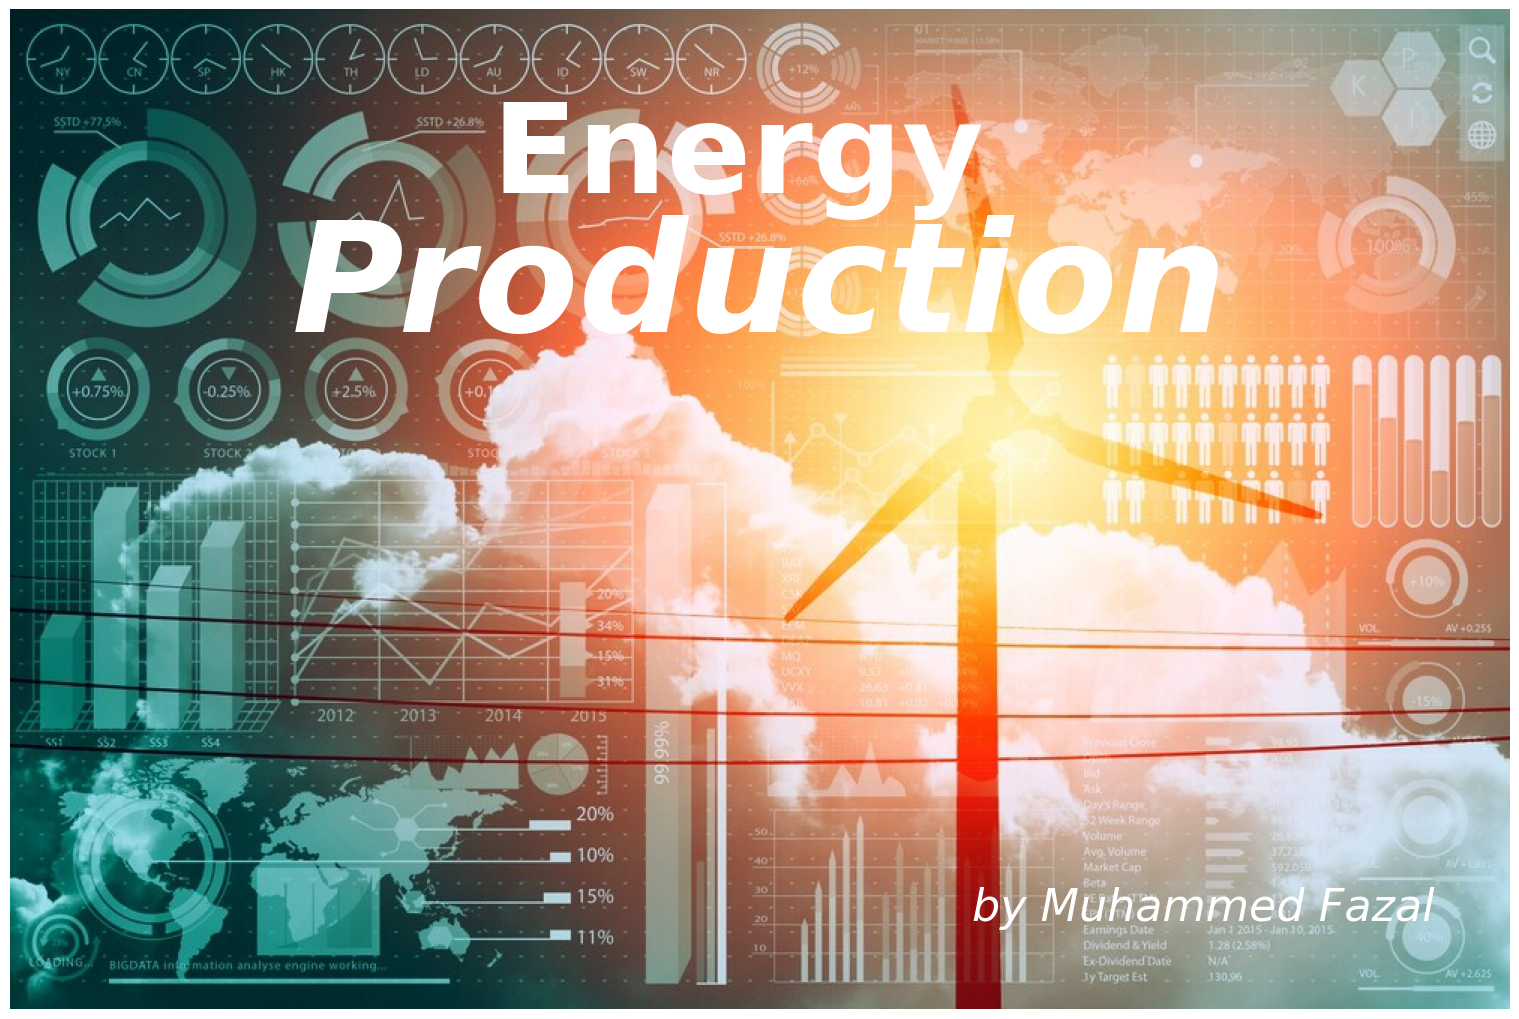

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Change this path to your Instagram background image
img_path = r"C:\Users\hp\Pictures\using-big-data-for-clean-energy.jpg"  # ← update if needed
img = mpimg.imread(img_path)

# Create figure
plt.figure(figsize=(16, 10))
plt.imshow(img)
plt.axis('off')

# TITLE - works on every computer (uses built-in fonts only)
plt.text(0.5, 0.85, 'Energy ', 
         fontsize=90, fontweight='bold', color='white',
         ha='center', va='center', transform=plt.gca().transAxes)

plt.text(0.5, 0.72, 'Production', 
         fontsize=110, fontweight='bold', color='white', style='italic',
         ha='center', va='center', transform=plt.gca().transAxes,
         fontfamily='sans-serif')  # safe fallback

# Your name - bottom right
plt.text(0.95, 0.08, 'by Muhammed Fazal',
         fontsize=32, color='white', style='italic',
         ha='right', va='bottom', transform=plt.gca().transAxes)
        #  bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', pad=12)

# Remove margins completely
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)

# Save high quality + show
plt.savefig('Instagram_Analytics_Cover_Final.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()